# Author's Comment
The Comments below is wrtten by the kaggle user, who uploaded this dataset.
First thing I want to tell you is that the purpose of this notebook is to predict one's victory based on the conditions written on the datasets. And it'll be achieved by a classfication, and trendy LightGBM model to get it better.

The second thing is that, I repeat these on my notebook just to let you know that I just followed the guidlines referred by the user.
If I continue to revise my model and work on it, it'd be much better to predict the victory of the battle.




## History of Battle
This dataset is a cleaned-up and modernized version of "CAA Database of Battles, Version 1990", shortnamed "CDB90". It contains information on over 600 battles that were fought between 1600 AD and 1973 AD. Descriptive data include battle name, date, and location; the strengths and losses on each side; identification of the victor; temporal duration of the battle; and selected environmental and tactical environment descriptors (such as type of fortifications, type of tactical scheme, weather conditions, width of front, etc.).


## Content
The data contained therein is split across several files. The most important of these is battles.csv, which is lists and gives information about the battles themselves. Files marked enum describe the keys used by specific fields. Other files provide additional context.

## Inspiration
-How often were battles fought in various weather conditions?

-How often did an attacker or defender achieve the element of surprise?

-Did it have a significant effect on the outcome?

-Did prepared fortifications have a significant effect on outcomes?


# Features

Before we get to the project, I'll make a referrence of the features to make it easier to understand the table.

-aeroa: air superitority

-cea: how much the actor favors attack or defense

-codead: total strength

-crit: ???

-post: how much defense prepared

-postype: posture taken

-pri: the form of tactics

-wina: 0-draw/1-attacker win/ -1 - attacker loss

-reso: result of the battle

-surpa: how much surprise achieved by attacker/defender

front_width: the features in it are unknown


### Terrain
-terra1 : None/Rugged/Rollig/Flat

-terra2 : Bare/Desert/Heavily Wooded/Mixed

-terra3 : None/ Marsh or Swamp/ Urban /Dunes

### Weather


-wx1: Dry/wet

-wx2: Heavy Precipitatiion/Sunny/Light Precipitation/Overcast

-wx3: hot/cold/temperate

-wx4: Spring/Summer/Fall/Winter

-wx5: Tropical/Desert/Temperate



# Data Overview

As mentioned above, the first phase will be just using 4 features.

-weather

-terrain

-the element of surprise

-fortification



Any other background knowledge will be used later on.
Before that, let us first overview the dataset.

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/database-of-battles/enum_post.csv
/kaggle/input/database-of-battles/battle_actors.csv
/kaggle/input/database-of-battles/battles.csv
/kaggle/input/database-of-battles/enum_aeroa.csv
/kaggle/input/database-of-battles/enum_pri.csv
/kaggle/input/database-of-battles/terrain.csv
/kaggle/input/database-of-battles/belligerents.csv
/kaggle/input/database-of-battles/enum_terra2.csv
/kaggle/input/database-of-battles/weather.csv
/kaggle/input/database-of-battles/enum_surpa.csv
/kaggle/input/database-of-battles/enum_reso.csv
/kaggle/input/database-of-battles/version.csv
/kaggle/input/database-of-battles/enum_wx4.csv
/kaggle/input/database-of-battles/enum_wx3.csv
/kaggle/input/database-of-battles/enum_terra1.csv
/kaggle/input/database-of-battles/front_widths.csv
/kaggle/input/database-of-battles/commanders.csv
/kaggle/input/database-of-battles/enum_cea.csv
/kaggle/input/database-of-battles/enum_wx5.csv
/kaggle/input/database-of-battles/enum_wx2.csv
/kaggle/input/database-of-battles/bat

# Exploring Dataset

## Tables

In [2]:
battle = pd.read_csv('/kaggle/input/database-of-battles/battles.csv')
display(battle.tail())
print(battle.columns)

,isqno,war,name,locn,campgn,postype,post1,post2,front,depth,...,is_hero,war2,war3,war4,war4_theater,dbpedia,cow_warno,cow_warname,war_initiator,parent
655,656,"ARAB-ISRAELI, 1948",JERUSALEM CORRIDOR,WEST BANK,JERUSALEM CORRIDOR,9,PD,NaN,NaN,NaN,...,0,"ARAB-ISRAELI, 1948","ARAB-ISRAELI, 1948",Arab-Israeli War of 1948-1949,NaN,http://dbpedia.org/resource/Operation_Danny,148.0,Arab-Israeli War of 1948-1949,0,NaN
656,657,WORLD WAR II,ARDENNES,NORTHWEST EUROPE,ARDENNES 1940,9,NaN,NaN,NaN,NaN,...,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,1,NaN
657,658,WORLD WAR II,CAMBRAI,NORTHWEST EUROPE,CAMBRAI,9,NaN,NaN,NaN,NaN,...,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,1,NaN
658,659,WORLD WAR II,ARRAS,NORTHWEST EUROPE,ARRAS,9,HD,NaN,NaN,NaN,...,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,0,NaN
659,660,WORLD WAR II,BOOS,NORTHWEST EUROPE,BOOS,9,PD,NaN,NaN,NaN,...,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,0,NaN


Index(['isqno', 'war', 'name', 'locn', 'campgn', 'postype', 'post1', 'post2',
       'front', 'depth', 'time', 'aeroa', 'surpa', 'cea', 'leada', 'trnga',
       'morala', 'logsa', 'momnta', 'intela', 'techa', 'inita', 'wina', 'kmda',
       'crit', 'quala', 'resa', 'mobila', 'aira', 'fprepa', 'wxa', 'terra',
       'leadaa', 'plana', 'surpaa', 'mana', 'logsaa', 'fortsa', 'deepa',
       'is_hero', 'war2', 'war3', 'war4', 'war4_theater', 'dbpedia',
       'cow_warno', 'cow_warname', 'war_initiator', 'parent'],
      dtype='object')


In [3]:
terrain = pd.read_csv('/kaggle/input/database-of-battles/terrain.csv')
display(terrain.tail())
print(terrain.columns)

,isqno,terrano,terra1,terra2,terra3
784,656,1,R,B,NaN
785,657,1,R,M,NaN
786,658,1,R,M,NaN
787,659,1,R,M,NaN
788,660,1,R,M,NaN


Index(['isqno', 'terrano', 'terra1', 'terra2', 'terra3'], dtype='object')


In [4]:
weather = pd.read_csv('/kaggle/input/database-of-battles/weather.csv')
display(weather.tail())
print(weather.columns)

,isqno,wxno,wx1,wx2,wx3,wx4,wx5
782,656,1,D,NaN,H,S,D
783,657,1,W,L,T,$,T
784,658,1,W,L,T,$,T
785,659,1,D,NaN,T,$,T
786,660,1,W,L,T,S,T


Index(['isqno', 'wxno', 'wx1', 'wx2', 'wx3', 'wx4', 'wx5'], dtype='object')


There are only 4 features that we're interested in, so we are gonna merge these tables and have only the features left.

-weather
-terrain
-fortification
-element of surprise achieved or not

In [15]:
#The revised dataset that contains all information needed

df = pd.merge(battle, terrain , on="isqno")
df = pd.merge(df, weather, on = "isqno")
df.set_index('isqno', inplace = True)
df = df[['surpa', 'post1', 'post2', 'wx1', 'wx2', 'wx3', 'wx4', 'wx5', 'terra1', 'terra2', 'terra3', 'wina']]

display(df.tail())

,surpa,post1,post2,wx1,wx2,wx3,wx4,wx5,terra1,terra2,terra3,wina
isqno,,,,,,,,,,,,
656,0.0,PD,NaN,D,NaN,H,S,D,R,B,NaN,NaN
657,3.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0
658,1.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0
659,0.0,HD,NaN,D,NaN,T,$,T,R,M,NaN,NaN
660,0.0,PD,NaN,W,L,T,S,T,R,M,NaN,0.0


In [16]:
# Based on what I searched for, Nan datas in 'wina' are supposed to be -1.(attacker loss)
df['wina'] = df['wina'].fillna(-1)
display(df)

,surpa,post1,post2,wx1,wx2,wx3,wx4,wx5,terra1,terra2,terra3,wina
isqno,,,,,,,,,,,,
1,0.0,HD,NaN,D,S,T,S,T,R,B,D,-1.0
2,0.0,HD,PD,D,S,T,W,T,R,M,NaN,1.0
3,0.0,HD,NaN,D,S,H,$,T,R,M,NaN,1.0
4,NaN,PD,NaN,D,S,T,$,T,R,M,NaN,-1.0
5,0.0,HD,NaN,D,S,T,S,T,R,M,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.0,PD,NaN,D,NaN,H,S,D,R,B,NaN,-1.0
657,3.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0
658,1.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0


The reason the amount of the datas increased is that each war consists of a few battles, and each battle has its own condition.
But it seems that the datas sharing same isqno have the same 'wina' value, so we don't need to set up the function to fix it.

* Different condtions but same result! Need to think about it one day

## Missing Data


Now we'll check missing data and se the tables in the form easy to analyse.

### Element of Surprise achieved or not

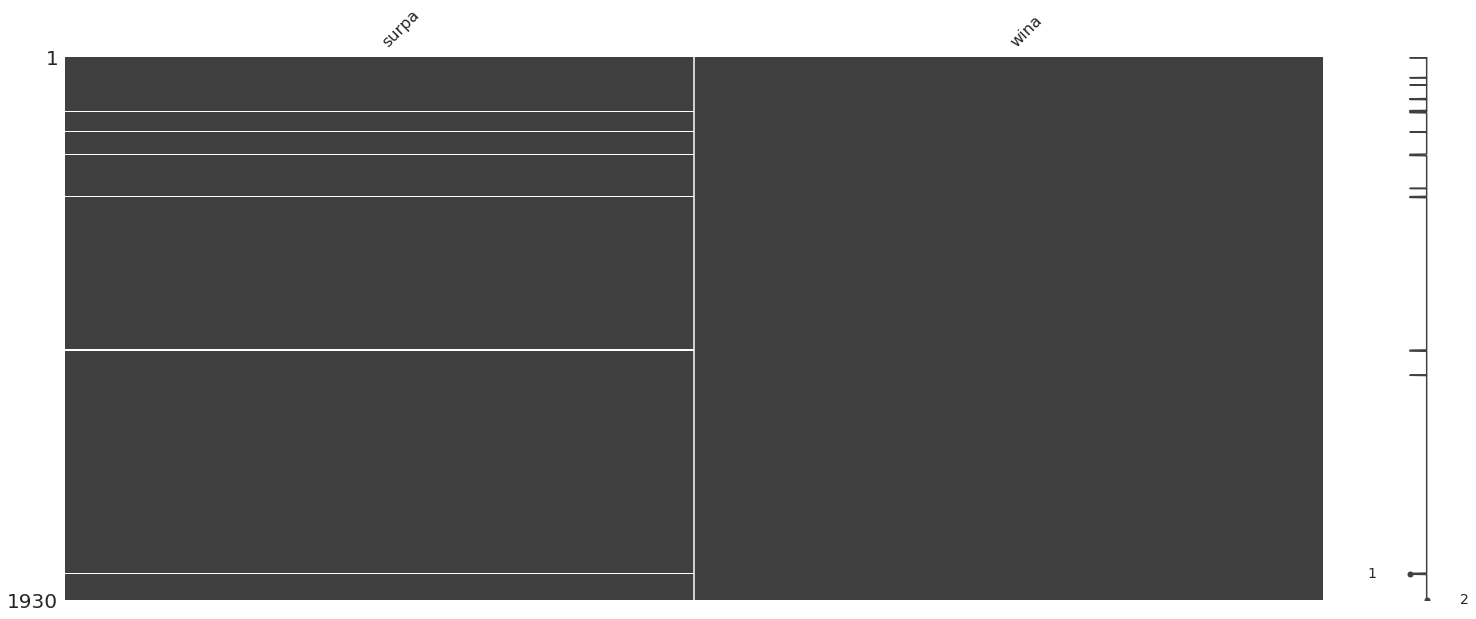

surpa    30
wina      0
dtype: int64


In [17]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
surprise = df[['surpa', 'wina']]

msno.matrix(surprise)
plt.show()

print(surprise.isnull().sum())

### Terrain

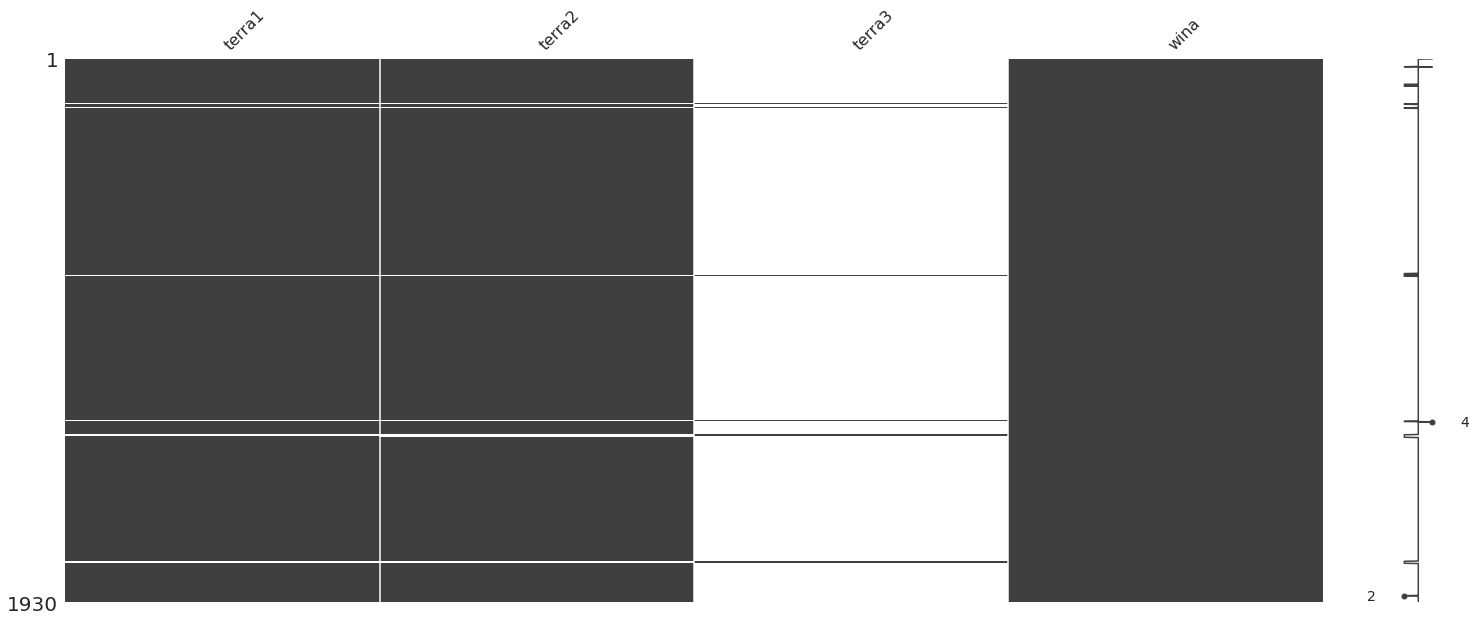

terra1      32
terra2      36
terra3    1894
wina         0
dtype: int64


In [18]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
terrain = df[['terra1', 'terra2', 'terra3', 'wina']]

msno.matrix(terrain)
plt.show()

print(terrain.isnull().sum()) 

### Weather

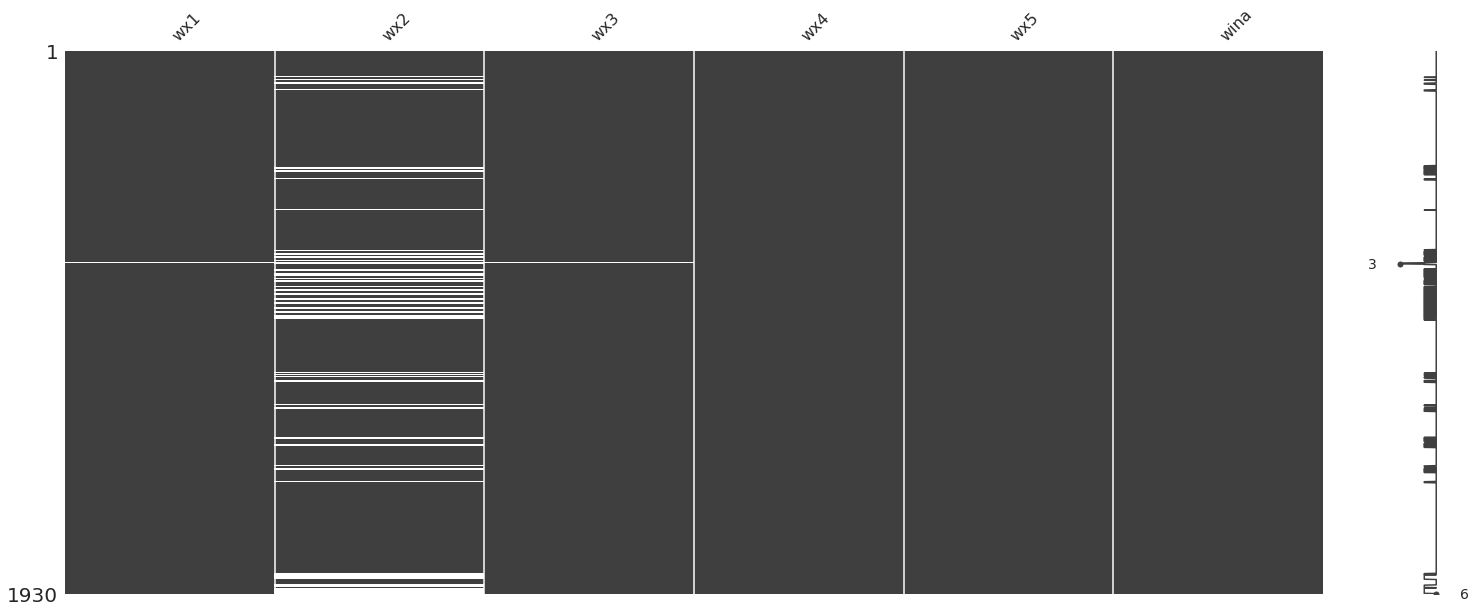

wx1       4
wx2     239
wx3       4
wx4       0
wx5       0
wina      0
dtype: int64


In [19]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
weather = df[['wx1', 'wx2', 'wx3', 'wx4', 'wx5','wina']]

msno.matrix(weather)
plt.show()

print(weather.isnull().sum())

### Fortification

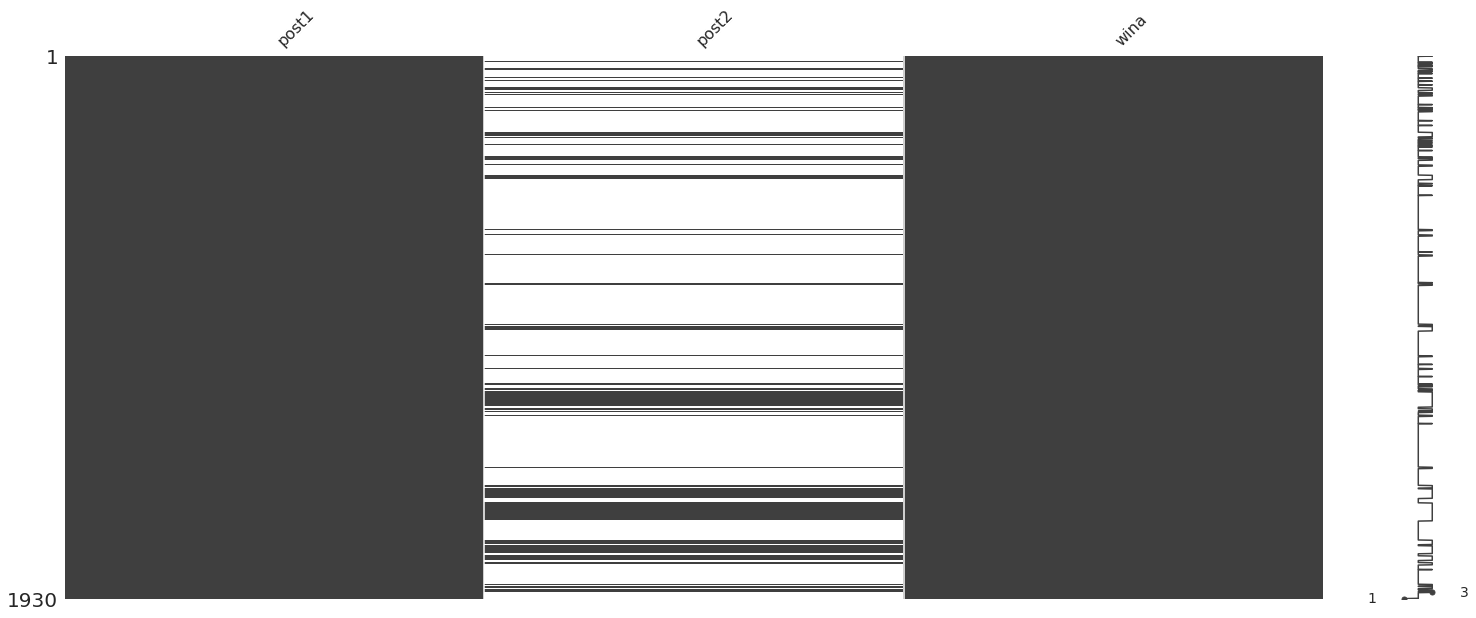

post1       2
post2    1491
wina        0
dtype: int64


In [20]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
fortification = df[['post1', 'post2' ,'wina']]
msno.matrix(fortification)
plt.show()

print(fortification.isnull().sum())

## Data Overview

### Reso Reference

*Reso*

AA - Annihilated

PS - Pursued

PP - Penetration

WD - Withdrew

RR- Repulse

BB - Breakthrough

SS - Stalemate

WL - Withdrew with heavy losses

### Element of Surprise

### Element of Surprise reference

-3 ~ -1 : surprise achieved by defender(-3: most, -2: substantial , -1: minor)
    
0 : Neither Side surprised
    
1 ~ 3 : surprise achieved by attacker(3: most, 2: substantial , 1: minor)

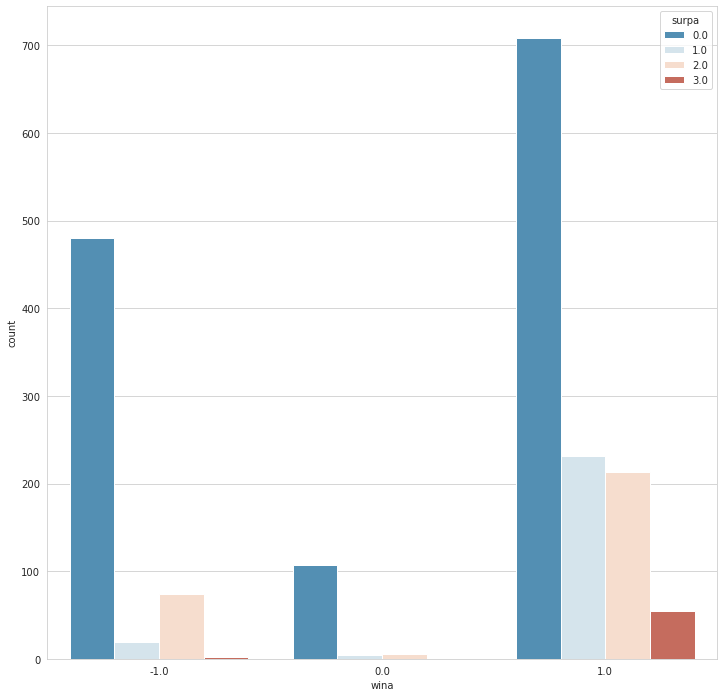

In [21]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x='wina',hue='surpa',data= surprise ,palette='RdBu_r')

### Terrain

### Terrain reference

terra 1:
    
    0 - None

    R - Rolling
    
    G - Rugged
    
    F - Flat
    
terra 2:
    
    0 - None
    
    B - Bare
    
    M - Mixed
    
    D - Desert
    
    W - Heavily Wooded
    
terra 3 :
    
    0 - None
    
    M - Marsh or Swamp
    
    U - Urban
    
    D - Dunes

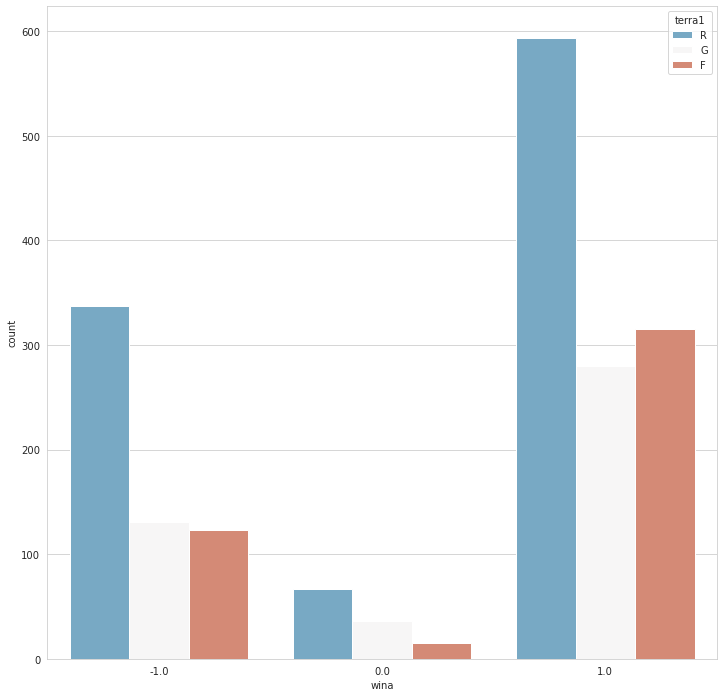

In [22]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x = 'wina', hue='terra1',data= terrain ,palette='RdBu_r')

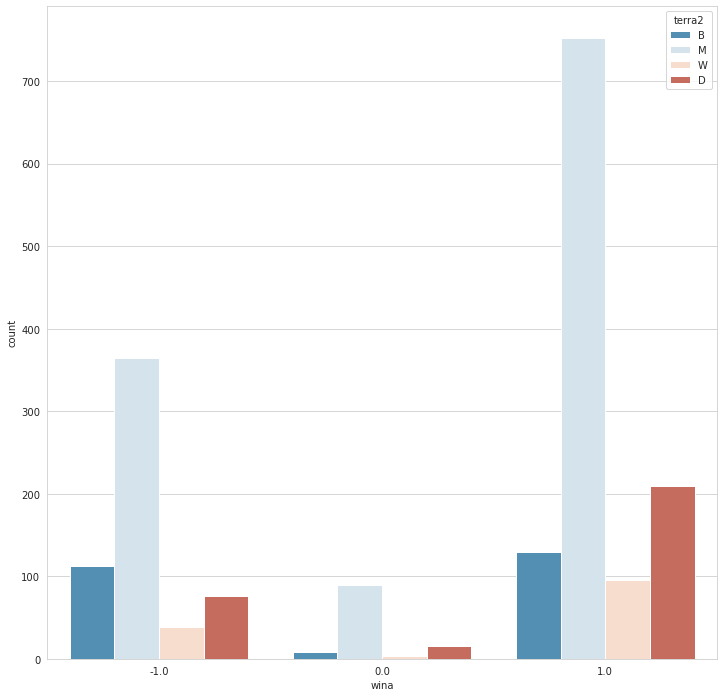

In [23]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x = 'wina', hue='terra2',data= terrain ,palette='RdBu_r')

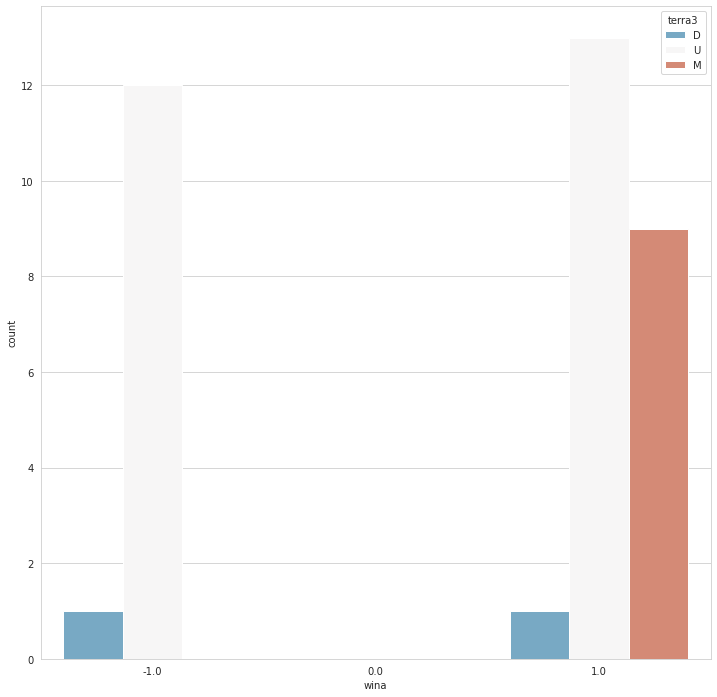

In [24]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x = 'wina', hue='terra3',data= terrain ,palette='RdBu_r')

### Weather

### Weather Reference

wx1:
    
    D - Dry
    W - Wet
    
wx2:
    
    H - Heavy Precipitatiion
    S - Sunny (no precipitation)
    L - Light Precipitation
    O - Overcast (no precipitation)
    
wx3:
    
    H - Hot
    C - Cold
    T - Temparate
    
wx4:

    S - Summer
    $ - Spring
    W - Winter
    F - Fall
    
wx5 : 
    
    E - Tropical (i.e., "Equatorial")
    D - Desert
    T - Temperate

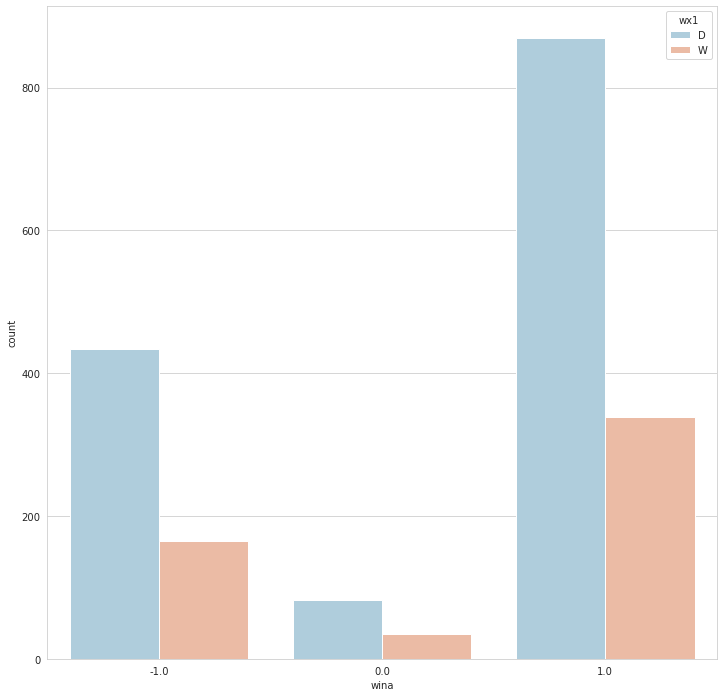

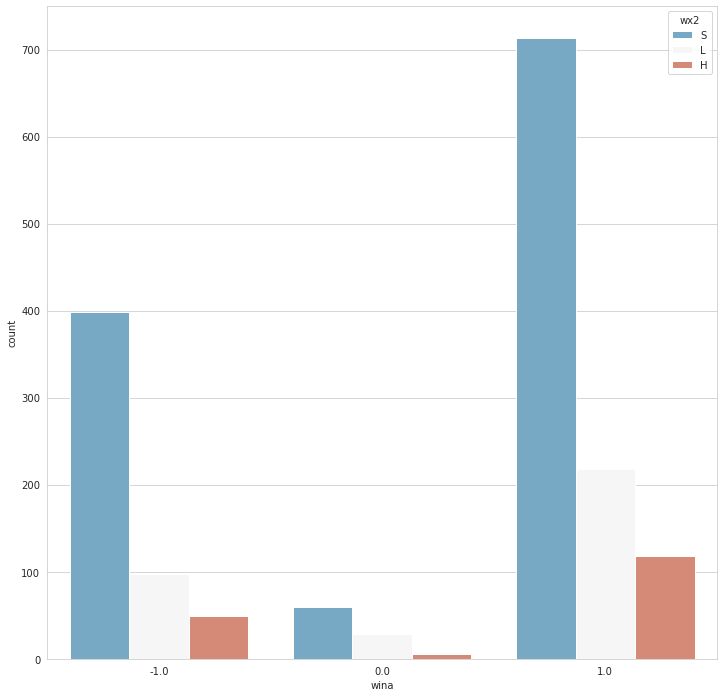

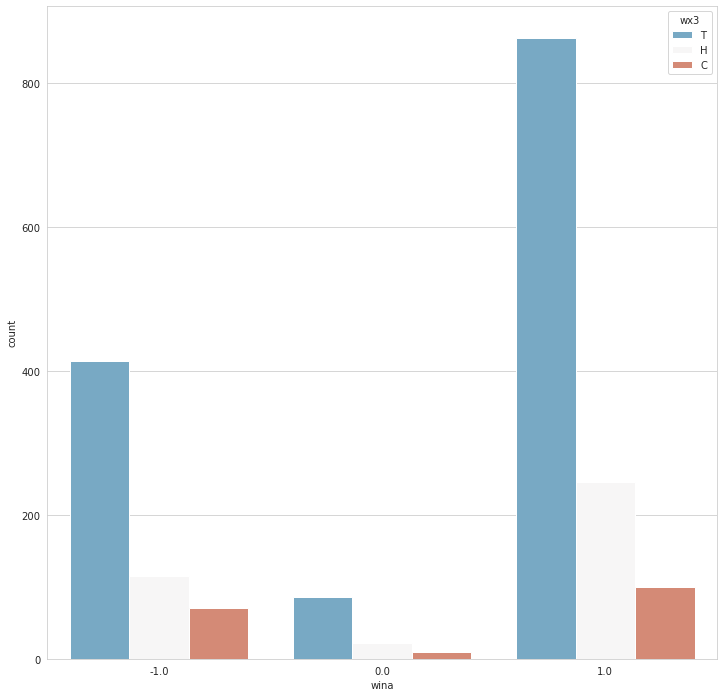

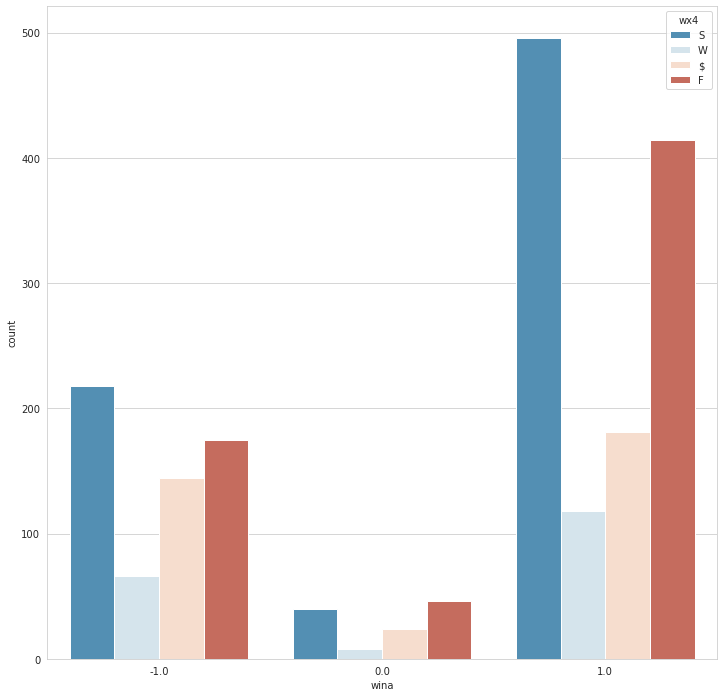

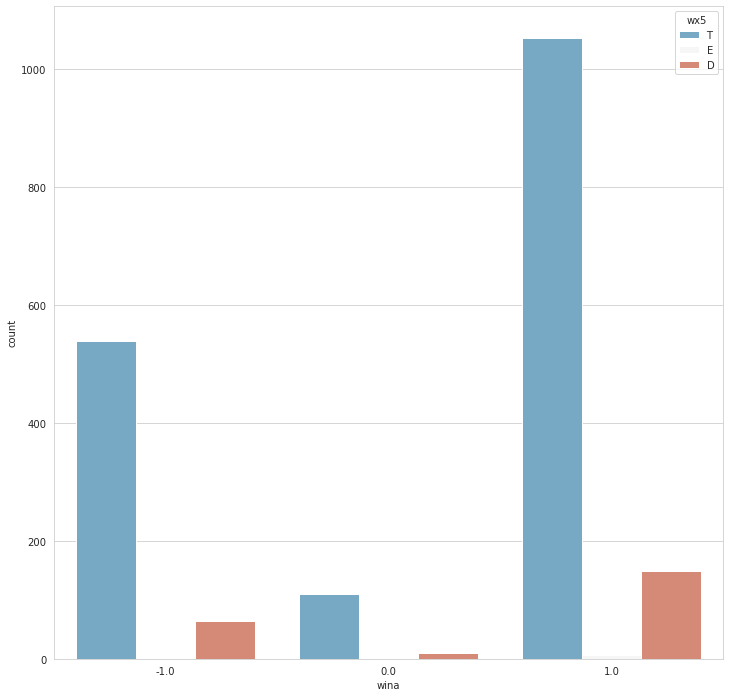

In [25]:
 for j in range(1, 6):
        
    plt.figure(figsize = (12, 12))
    sns.set_style('whitegrid')
    sns.countplot(x='wina', hue='wx{}'.format(j),data= weather ,palette='RdBu_r')


### Fortification

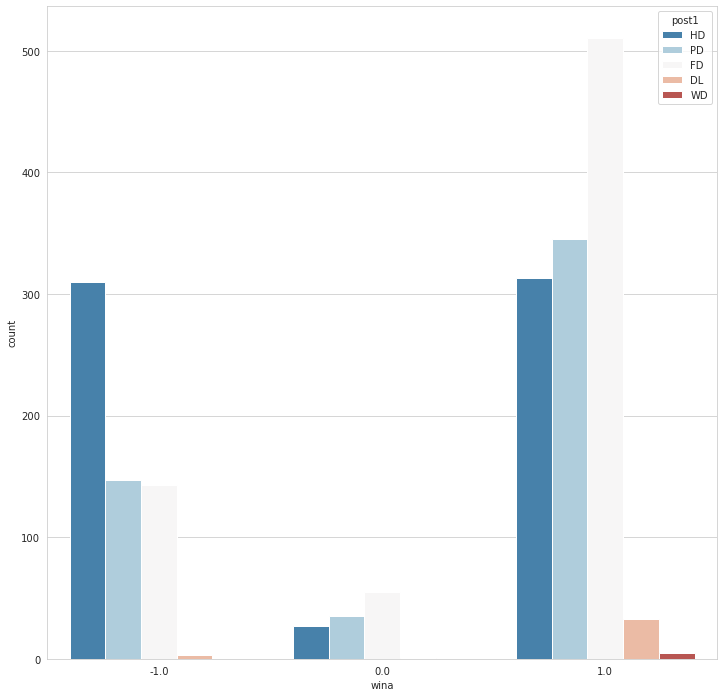

In [26]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x='wina', hue='post1',data= fortification ,palette='RdBu_r')

In [ ]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x='wina', hue='post2',data= fortification ,palette='RdBu_r')